# Counting Bloom Filter

In [1]:
import numpy as np #importing libraries
import math

n = 100 #items to have in filter
length = 2*n #having double sized to deal with collisions
print("(n) Number of items we expect to have in filter:", n)

p = 0.1 #false positive rate, from 0.0 to 1.0
print("(p) False positive rate set as:",p*100,"%")


m = (-n*np.log(p)) / (0.48045) #bits needed in bloom filter
m = int(round(m)) #space of actual data structure that holds the data is O(m)
print("(m) Calculated number of bits needed in bloom filter:",m)
print("\t m = -n*ln(p) / (ln(2)^2)") # memory size as a function of number of items and false positive rate

k = m/n * np.log(2) #hash functions required
k = int(math.ceil(k))
print("(k) Calculated number of hash functions required:", k)
print("\t k = m/n * ln(2)")

(n) Number of items we expect to have in filter: 100
(p) False positive rate set as: 10.0 %
(m) Calculated number of bits needed in bloom filter: 479
	 m = -n*ln(p) / (ln(2)^2)
(k) Calculated number of hash functions required: 4
	 k = m/n * ln(2)


In [2]:
array = [None for i in range(length)] #intiliazing empty array of expected elements we're adding(twice as n to prevent collisions)
bloom = [0 for i in range(m)] #initlializing the bloom filter of size m, as calculated above

"""
one hash function which can acts as many hash functions as requiredby changing x argument input
"""
def hashing(element,x): #hash function
    if x%2 == 0: 
        return int(((element*((x+1)/20))-(x-10))) % m
    else:
        return int(((element*(1+x))-(x*0.9+1))) % m

In [3]:
"""
function to insert an element into the array list and updating the bloom filter accordingly
"""
def insert(element, i = 0):
    global array
    global k
    
    hashedidx = [] #to store list of indexes from multiple hash functions
    
    for j in range(k): #iterate as many times as we needed hash function, (k)
        hashedidx.append(hashing(element,j)) #get hash functions outputs
    
    idx = ((sum(hashedidx) - hashedidx[len(hashedidx)-1]) + (hashedidx[len(hashedidx)-1]*i)) % length #hashing

    if array[idx] == None or array[idx] == 0: #if slot available
        array[idx] = element #insert element
        addBloom(hashedidx) #after element inserted, change values in count bloom filter
        return True
    
    else: #otherwise recursive by incrementing iteration variable
        return insert(element, i+1) 
    
def addBloom(idx): #update the bloom filter after inserting element
    global bloom
    for i in idx: #for each index from hash functions we increment values in bloom filter
        bloom[i]+=1

In [4]:
"""
function to probabilistically check if element in the list
"""
def check(element): #chekcing if the element is in the list using bloom filter
    global array
    global bloom
    global k
    
    count = 0 #counter
    
    hashedidx = [] #to store hash functions ouput
    
    for i in range(k): #iterate as many times as we needed hash function, (k)
        hashedidx.append(hashing(element,i)) #get hash functions outputs

    for i in hashedidx: #check for each hash function output
        if bloom[i] > 0: #check if the index is greater than 0
            count+=1 #increase counter
    if count == len(hashedidx): #if all the hashed output index are > 0, then
        return True #there is probability that element may be present
    else:
        return False #otherwise absolutely not present

In [5]:
"""
funciton to delete an element from the list and update count bloom filter accordingly
"""
def delete(element, i=0):
    global k
    hashedidx = [] #to store hash funcitons ouput
    
    for j in range(k): #iterate as many times as we needed hash function, (k)
        hashedidx.append(hashing(element,j)) #get hash functions outputs
    
    idx = ((sum(hashedidx) - hashedidx[len(hashedidx)-1]) + (hashedidx[len(hashedidx)-1]*i)) % length #hashing
    
    if array[idx] == element: #if that slot that has the element
        array[idx] = 0 #delete the element
        delBloom(hashedidx) #update bloom
    elif array[idx] == None: #if the slot is empty
        return print("Element not in the list") #hence, the element isn't in the list
    else:
        return delete(element, i+1) #otherwise, check next possible occurence

def delBloom(idx): #update the bloom filter
    global bloom
    for i in idx: #for each index from hash functions we decrement values in bloom filter
        bloom[i]-=1

In [6]:
"""
Now, we will start running test to check the practically obtained false positive rate (FPR) and compare it with our 
initialized set FPR

For our test, we are feeding data of 'n' unique elements and then testing it with another 'n' unique elements
technically, we should get 'n' times "absolutely not in the list" as all the test elements are unique
therefore every positive result we get is actually false postive
"""
import random

testSet = [1000*i for i in range(1,30)] #creating number of elements set
fpSet = [] #to store FPR for each test set elements

for size in testSet:
    n = size #items to have in filter
    length = 2*n
    p = 0.05 #false positive rate, from 0.0 to 1.0 <--- set FPR
    m = (-n*np.log(p)) / (0.48045) #calculations as done above
    m = int(round(m))
    k = m/n * np.log(2)
    k = int(math.ceil(k))
    array = [None for i in range(length)] #resetting 
    bloom = [0 for i in range(m)]

    feedData = list(range(1,size))
    testData = list(range(size+1, 2*size+1))

    fp = 0
    for y in feedData:
        insert(y)

    for y in testData:
        if check(y) == True:
            fp+=1
    
    fpSet.append((fp/size)*100)

Using memory size of 180823 bits in counting bloom filter


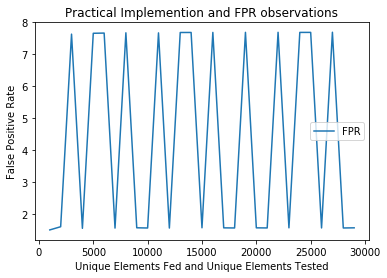

FPR initialized as 5.0 %
Practical observation average: 4.302708654133927 %


In [8]:
from matplotlib import pyplot as plt
#plots each graph
print("Using memory size of",m,"bits in counting bloom filter")
plt.plot(testSet,fpSet, label='FPR')
plt.title('Practical Implemention and FPR observations')
plt.xlabel("Unique Elements Fed and Unique Elements Tested")
plt.ylabel("False Positive Rate")
plt.legend()
plt.show()
print("FPR initialized as",p*100,"%")
print("Practical observation average:",sum(fpSet)/len(fpSet),"%")

In [9]:
"""
using the same code as above, we will only change the initialized set FPR and compare it with average observed FPR
"""

fpSet = []

for size in testSet:
    n = size #items to have in filter
    length = 2*n
    p = 0.2 #false positive rate, from 0.0 to 1.0
    m = (-n*np.log(p)) / (0.48045)
    m = int(round(m))
    k = m/n * np.log(2)
    k = int(math.ceil(k))
    array = [None for i in range(length)]
    bloom = [0 for i in range(m)]

    feedData = list(range(1,size))
    testData = list(range(size+1, 2*size+1))

    fp = 0
    for y in feedData:
        insert(y)

    for y in testData:
        if check(y) == True:
            fp+=1
    
    fpSet.append((fp/size)*100)

Using memory size of 97146 bits in counting bloom filter


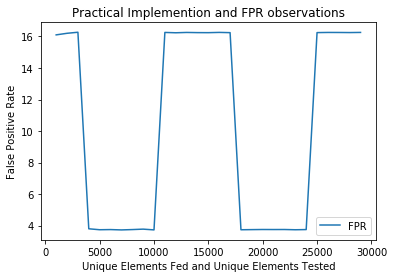

FPR initialized as 20.0 %
Practical observation average: 10.20874612312953 %


In [10]:
#plots each graph
print("Using memory size of",m,"bits in counting bloom filter")
plt.plot(testSet,fpSet, label='FPR')
plt.title('Practical Implemention and FPR observations')
plt.xlabel("Unique Elements Fed and Unique Elements Tested")
plt.ylabel("False Positive Rate")
plt.legend()
plt.show()
print("FPR initialized as",p*100,"%")
print("Practical observation average:",sum(fpSet)/len(fpSet),"%")

In [11]:
fpSet = []

for size in testSet:
    n = size #items to have in filter
    length = 2*n
    p = 0.25 #false positive rate, from 0.0 to 1.0
    m = (-n*np.log(p)) / (0.48045)
    m = int(round(m))
    k = m/n * np.log(2)
    k = int(math.ceil(k))
    array = [None for i in range(length)]
    bloom = [0 for i in range(m)]

    feedData = list(range(1,size))
    testData = list(range(size+1, 2*size+1))

    fp = 0
    for y in feedData:
        insert(y)

    for y in testData:
        if check(y) == True:
            fp+=1
    
    fpSet.append((fp/size)*100)

Using memory size of 83677 bits in counting bloom filter


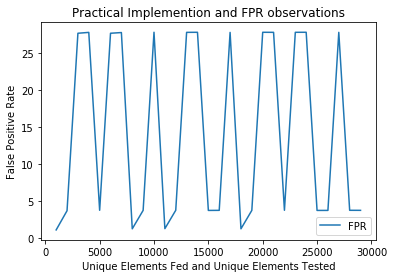

FPR initialized as 25.0 %
Practical observation average: 14.196855258603863 %


In [12]:
#plots each graph
print("Using memory size of",m,"bits in counting bloom filter")
plt.plot(testSet,fpSet, label='FPR')
plt.title('Practical Implemention and FPR observations')
plt.xlabel("Unique Elements Fed and Unique Elements Tested")
plt.ylabel("False Positive Rate")
plt.legend()
plt.show()
print("FPR initialized as",p*100,"%")
print("Practical observation average:",sum(fpSet)/len(fpSet),"%")